In [1]:
from time import time_ns
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import quimb.tensor as qtn
from decoder.sweepline import sweepline_contract

/Users/benjamindalfavero/.venv/tensors/lib/python3.12/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
L = 3
chi = 5
tn = qtn.tensor_2d.PEPS.rand(L, L, chi, phys_dim=2)
coords = []
for i in range(L):
    for j in range(L):
        coords.append((i, j))

time_builtin_start = time_ns()
exact_contraction = tn.contract()
time_builtin_end = time_ns()

In [3]:
bonds = []
distances = []
times_sweep = []
for max_bond in range(100):
    time_start = time_ns()
    approx_contraction = sweepline_contract(tn, coords, max_bond)
    time_sweep_end = time_ns()
    bonds.append(max_bond)
    distances.append(norm(approx_contraction.data - exact_contraction.data))
    times_sweep.append(time_sweep_end - time_start)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at /Users/benjamindalfavero/Documents/phd/decoder/decoder/sweepline.py (40)

File "../decoder/sweepline.py", line 40:
def decompose_tensor_as_MPS(
    <source elided>

@njit
^ 

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class 'quimb.tensor.tensor_2d.PEPS'>


Text(0, 0.5, 'Distances to exact result')

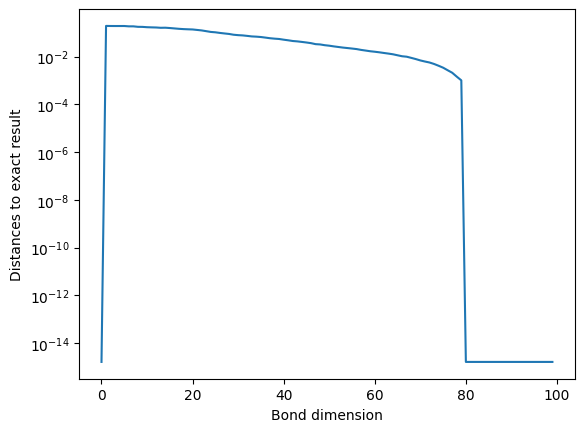

In [10]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(bonds, distances)
ax.set_xlabel('Bond dimension')
ax.set_ylabel('Distances to exact result')

Text(0, 0.5, 'Time to contract')

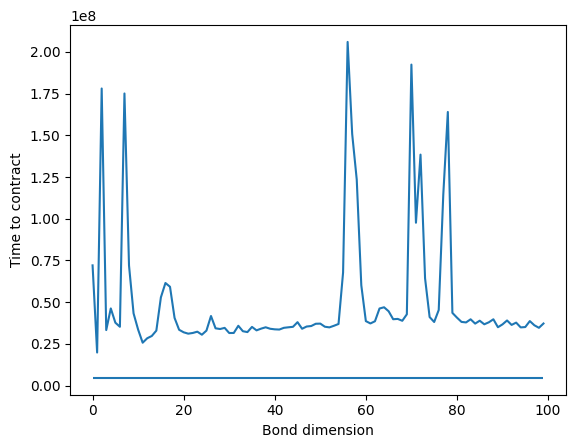

In [11]:
fig2, ax2 = plt.subplots()
ax2.plot(bonds, times_sweep)
ax2.hlines(time_builtin_end - time_builtin_start, np.min(bonds), np.max(bonds))
ax2.set_xlabel('Bond dimension')
ax2.set_ylabel('Time to contract')